# Building A Handwritten Digits Classifier #

## Working with Image Data##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits


digit = load_digits()
digit.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [2]:
# transform 'target' array into pandas Series
labels = pd.Series(digit['target'])

In [3]:
# transform 'data' array into pandas Dataframe
features = pd.DataFrame(digit['data'])
print(features.shape)
features.head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


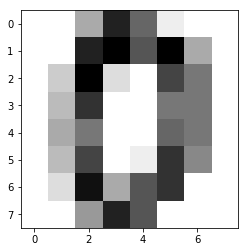

In [4]:
# visualize the first image (first row) in the dataset (in Black and White)
first_image = features.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')
plt.show()

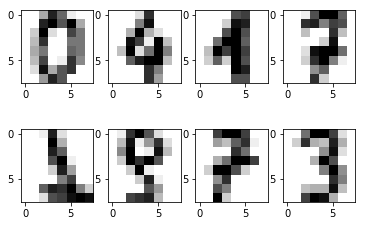

In [5]:
# visualize some of the images in the dataset
fig, ax = plt.subplots(2, 4)

# first row, display the images corresponding to rows 0, 100, 200 and 300
ax[0,0].imshow(features.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0,1].imshow(features.iloc[100].values.reshape(8,8), cmap='gray_r')
ax[0,2].imshow(features.iloc[200].values.reshape(8,8), cmap='gray_r')
ax[0,3].imshow(features.iloc[300].values.reshape(8,8), cmap='gray_r')

# second row, display the images corresponding to rows 1000, 1100, 1200 and 1300
ax[1,0].imshow(features.iloc[1000].values.reshape(8,8), cmap='gray_r')
ax[1,1].imshow(features.iloc[1100].values.reshape(8,8), cmap='gray_r')
ax[1,2].imshow(features.iloc[1200].values.reshape(8,8), cmap='gray_r')
ax[1,3].imshow(features.iloc[1300].values.reshape(8,8), cmap='gray_r')

plt.show()

## Training with K-Nearest Neighbors (KNN) Model##

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the KNN algorithm make no such assumption. This allows them to capture nonlinearity in the data.

Let's experiment with different values for **k** and plot the resulting classification accuracies.

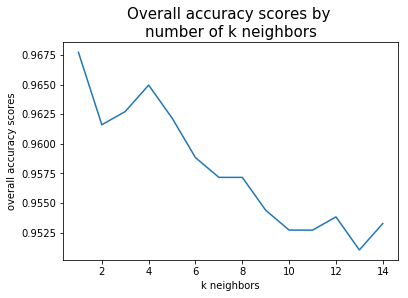

In [6]:
# splitting up the data into half train and half test sets
half_length = int(len(features)/2)
train_features = features[:half_length]
train_labels = labels[:half_length]
test_features = features[half_length:]
test_labels = labels[half_length:]

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

#setting a pipeline for training and testing with different k neighbors
def train(k, train_features, train_labels):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(train_features, train_labels)
    return knc

def test(train_model, test_features, test_labels):
    predictions = train_model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    return accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(k, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return np.mean(fold_accuracies)

# experiment with different K values
k_values = list(range(1,15))
k_accuracies = list()

for k in k_values:
    k_accuracy = cross_validate(k)
    k_accuracies.append(k_accuracy)
    
plt.plot(k_values, k_accuracies)
plt.xlabel('k neighbors')
plt.ylabel('overall accuracy scores')
plt.title('Overall accuracy scores by \nnumber of k neighbors', fontsize=15)
plt.show()

From the graph, we can see that the higher the number of neighbors, the lower the accuracy score. That means using KNN is getting a few downsides:
- high memory usage (for each new unseen observation, many comparisions need to be made to seen observations)
- no model representation to debug and explore.

Let's now try a neural network with a single hidden layer instead.

## Neural network with One Hidden Layer##

{8: 0.8931403118040089, 16: 0.9232009403612967, 32: 0.9332108389012621, 64: 0.9432281613462015, 128: 0.9426825043306112, 256: 0.9493578322197476}


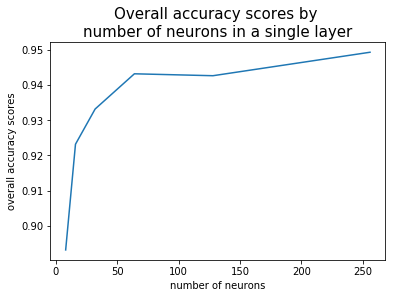

In [7]:
from sklearn.neural_network import MLPClassifier

#setting a pipeline for training and testing with a single hidden layer but different neuron contents
def train(n, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes=(n,), max_iter=1000)
    nn.fit(train_features, train_labels)
    return nn

def test(train_model, test_features, test_labels):
    test_predictions = train_model.predict(test_features)
    test_accuracy = accuracy_score(test_labels, test_predictions)
    return test_accuracy

def cross_validate(n):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(n, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return np.mean(fold_accuracies)

# experiment with a single hidden layer but different neuron contents
neurons = [8, 16, 32, 64, 128, 256]
nn_accuracies = dict()

for n in neurons:
    nn_accuracy = cross_validate(n)
    nn_accuracies[n] = nn_accuracy

print(nn_accuracies)

plt.plot(neurons, nn_accuracies.values())
plt.xlabel('number of neurons')
plt.ylabel('overall accuracy scores')
plt.title('Overall accuracy scores by \nnumber of neurons in a single layer', fontsize=15)

plt.show()

The mean accuracy score reaches the highest value, 94.9% when there are 128 neurons in the single hidder layer. Then, the score goes down to 94% when we increase the number of neurons to 256. But given that KNN achieved approcimately 97% accuracy as above, there doesn't seem to be more convenient to use a single hidden layer neural network for this problem. 

Let's see at which point the models are starting to overfit (in other words, at which point the performance in the training set is much higher than one in the test set).

C:\Users\Vinh Phuc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


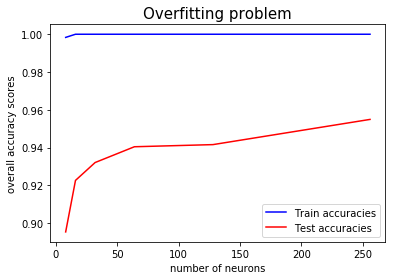

In [8]:
def train(n, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes=(n,), max_iter=1000)
    nn.fit(train_features, train_labels)
    return nn

def train_acc(train_model, train_features, train_labels):
    train_predictions = train_model.predict(train_features)
    train_accuracy = accuracy_score(train_labels, train_predictions)
    return train_accuracy

def test_acc(train_model, test_features, test_labels):
    test_predictions = train_model.predict(test_features)
    test_accuracy = accuracy_score(test_labels, test_predictions)
    return test_accuracy

def cross_validate(n):
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(n, train_features, train_labels)
        
        train_accuracy = train_acc(model, train_features, train_labels)
        test_accuracy = test_acc(model, test_features, test_labels)
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    return [np.mean(train_accuracies), np.mean(test_accuracies)]

neurons = [8, 16, 32, 64, 128, 256]
acc = list()
for n in neurons:
    accuracy = cross_validate(n)
    acc.append(accuracy)

df = pd.DataFrame(acc)

plt.plot(neurons, df[0], color='blue', label='Train accuracies')
plt.plot(neurons, df[1], color = 'red', label='Test accuracies')
plt.title('Overfitting problem', fontsize=15)
plt.xlabel('number of neurons')
plt.ylabel('overall accuracy scores')
plt.legend()

plt.show()

We can tell that the overfitting occurs most clearly when numbers of neurons = 8. Then it decreases gradually until neuron numbers = 128 and remains slightly stable after that.

## Neural Network with Two Hidden Layers##

Now let's try using two hidden layers and continue to increase the number of neurons in each layer.

In [9]:
def train(n, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes=(n,n), max_iter=1000)
    nn.fit(train_features, train_labels)
    return nn

def test(train_model, test_features, test_labels):
    test_predictions = train_model.predict(test_features)
    test_accuracy = accuracy_score(test_labels, test_predictions)
    return test_accuracy

def cross_validate(n):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(n, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return np.mean(fold_accuracies)

# feeding 64, 128 and 256 neurons into each layer
neurons = [64, 128, 256]
accuracies = {}
for n in neurons:
    acc = cross_validate(n)
    accuracies[n] = acc

accuracies

{64: 0.9487998020292007, 128: 0.9549232863152685, 256: 0.9593689680772086}

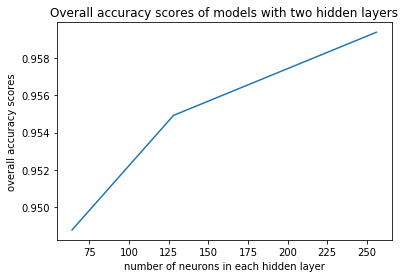

In [10]:
plt.plot(neurons, accuracies.values())
plt.xlabel('number of neurons in each hidden layer')
plt.ylabel('overall accuracy scores')
plt.title('Overall accuracy scores of models with two hidden layers')
plt.show()

The accuracy seems to be improved after adding two hidden layers instead of one, reaching out to 95.9%.

Let's see how the models is overfitting.

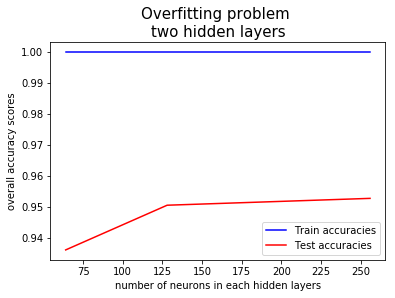

In [11]:
def train(n, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes=(n,n), max_iter=1000)
    nn.fit(train_features, train_labels)
    return nn

def train_acc(train_model, train_features, train_labels):
    train_predictions = train_model.predict(train_features)
    train_accuracy = accuracy_score(train_labels, train_predictions)
    return train_accuracy

def test_acc(train_model, test_features, test_labels):
    test_predictions = train_model.predict(test_features)
    test_accuracy = accuracy_score(test_labels, test_predictions)
    return test_accuracy

def cross_validate(n):
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(n, train_features, train_labels)
        
        train_accuracy = train_acc(model, train_features, train_labels)
        test_accuracy = test_acc(model, test_features, test_labels)
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    return [np.mean(train_accuracies), np.mean(test_accuracies)]

neurons = [64, 128, 256]
acc = list()
for n in neurons:
    accuracy = cross_validate(n)
    acc.append(accuracy)

df = pd.DataFrame(acc)

plt.plot(neurons, df[0], color='blue', label='Train accuracies')
plt.plot(neurons, df[1], color = 'red', label='Test accuracies')
plt.title('Overfitting problem \ntwo hidden layers', fontsize=15)
plt.xlabel('number of neurons in each hidden layers')
plt.ylabel('overall accuracy scores')
plt.legend()

plt.show()

The gap of 0.6% and lower tells us that the overfitting is very low. We could say the two hidden layer neural networks is working quite very well in this case. 

Ultimately, we'll try with new models adding three hidden layers.

## Neural Network with Three Hidden Layers##

This time, modify the pipeline to use 6 fold cross validation and set respectly 10, 64, 128 and 256 neurons in each of three hidden layers.

{10: 0.91152917131178, 64: 0.9476923076923077, 128: 0.9610442214790041}


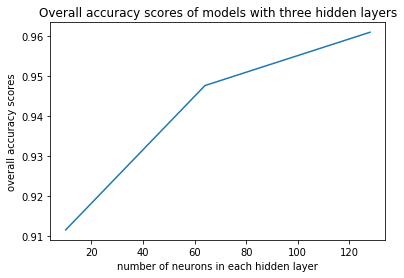

In [13]:
def train(n, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes=(n,n,n), max_iter=1000)
    nn.fit(train_features, train_labels)
    return nn

def test(train_model, test_features, test_labels):
    test_predictions = train_model.predict(test_features)
    test_accuracy = accuracy_score(test_labels, test_predictions)
    return test_accuracy

def cross_validate(n):
    fold_accuracies = []
    kf = KFold(n_splits=6, random_state=2)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(n, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return np.mean(fold_accuracies)

# feeding 10, 64, 128 and 256 neurons into each layer
neurons = [10, 64, 128]
accuracies = {}
for n in neurons:
    acc = cross_validate(n)
    accuracies[n] = acc

print(accuracies)

plt.plot(neurons, accuracies.values())
plt.xlabel('number of neurons in each hidden layer')
plt.ylabel('overall accuracy scores')
plt.title('Overall accuracy scores of models with three hidden layers')
plt.show()

Using three hidden layers enhanced our accuracy to 96.1% even with 6-fold cross validation. Having more layers and more neurons tends to improve the network's performance.

## Activation functions ##

We're going to add different activation functions in the three-hidden-layer network models to see if the accuracies improve.

{10: 0.8413991081382387, 64: 0.933221850613155, 128: 0.9443571163136381, 256: 0.9527053140096619}


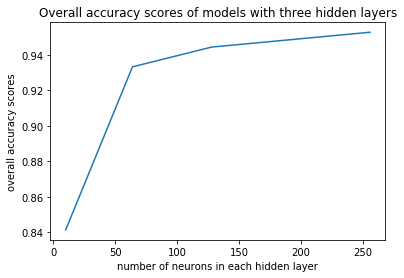

In [16]:
# Activate sigmoid function
def train(n, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes=(n,n,n), activation='logistic', max_iter=5000)
    nn.fit(train_features, train_labels)
    return nn

def test(train_model, test_features, test_labels):
    test_predictions = train_model.predict(test_features)
    test_accuracy = accuracy_score(test_labels, test_predictions)
    return test_accuracy

def cross_validate(n):
    fold_accuracies = []
    kf = KFold(n_splits=6, random_state=2)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(n, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return np.mean(fold_accuracies)

neurons = [10, 64, 128, 256]
accuracies = {}
for n in neurons:
    acc = cross_validate(n)
    accuracies[n] = acc

print(accuracies)

plt.plot(neurons, accuracies.values())
plt.xlabel('number of neurons in each hidden layer')
plt.ylabel('overall accuracy scores')
plt.title('Overall accuracy scores of models with three hidden layers \nSigmoid function activated')
plt.show()

{10: 0.9120810107766629, 64: 0.9510497956150131, 128: 0.954362690449647, 256: 0.957712746191007}


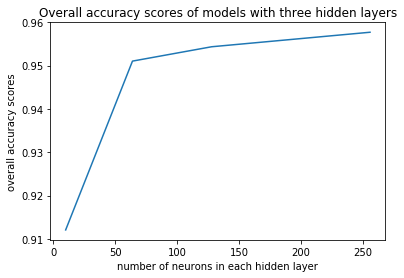

In [17]:
# Activate reLU function
def train(n, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes=(n,n,n), activation='relu', max_iter=5000)
    nn.fit(train_features, train_labels)
    return nn

def test(train_model, test_features, test_labels):
    test_predictions = train_model.predict(test_features)
    test_accuracy = accuracy_score(test_labels, test_predictions)
    return test_accuracy

def cross_validate(n):
    fold_accuracies = []
    kf = KFold(n_splits=6, random_state=2)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(n, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return np.mean(fold_accuracies)

neurons = [10, 64, 128, 256]
accuracies = {}
for n in neurons:
    acc = cross_validate(n)
    accuracies[n] = acc

print(accuracies)

plt.plot(neurons, accuracies.values())
plt.xlabel('number of neurons in each hidden layer')
plt.ylabel('overall accuracy scores')
plt.title('Overall accuracy scores of models with three hidden layers \nReLU function activated')
plt.show()

{10: 0.856462281679673, 64: 0.9326755852842811, 128: 0.95603121516165, 256: 0.9638294314381272}


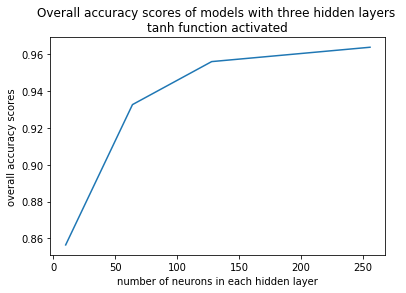

In [18]:
# Activate tanh function
def train(n, train_features, train_labels):
    nn = MLPClassifier(hidden_layer_sizes=(n,n,n), activation='tanh', max_iter=5000)
    nn.fit(train_features, train_labels)
    return nn

def test(train_model, test_features, test_labels):
    test_predictions = train_model.predict(test_features)
    test_accuracy = accuracy_score(test_labels, test_predictions)
    return test_accuracy

def cross_validate(n):
    fold_accuracies = []
    kf = KFold(n_splits=6, random_state=2)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(n, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return np.mean(fold_accuracies)

neurons = [10, 64, 128, 256]
accuracies = {}
for n in neurons:
    acc = cross_validate(n)
    accuracies[n] = acc

print(accuracies)

plt.plot(neurons, accuracies.values())
plt.xlabel('number of neurons in each hidden layer')
plt.ylabel('overall accuracy scores')
plt.title('Overall accuracy scores of models with three hidden layers \ntanh function activated')
plt.show()

It is likely that the `tanh` function improved the performance's model to 96.3%, whereas the `sigmoid` and `logistic` aren't very helpful in our case.

We decide to keep the `tanh` function activated inside our models to visualizing weights. 

## Visualizing of MLP weights on MNIST##

Iteration 1, loss = 1.83105169
Iteration 2, loss = 0.52170278
Iteration 3, loss = 0.20658216
Iteration 4, loss = 0.08588203
Iteration 5, loss = 0.04762411
Iteration 6, loss = 0.02276279
Iteration 7, loss = 0.01347045
Iteration 8, loss = 0.01029372
Iteration 9, loss = 0.00788155
Iteration 10, loss = 0.00406572
Iteration 11, loss = 0.00292906
Iteration 12, loss = 0.00244424
Iteration 13, loss = 0.00205720
Iteration 14, loss = 0.00181463
Iteration 15, loss = 0.00162890
Iteration 16, loss = 0.00149554
Iteration 17, loss = 0.00138573
Iteration 18, loss = 0.00130237
Iteration 19, loss = 0.00123165
Iteration 20, loss = 0.00116913
Iteration 21, loss = 0.00111241
Iteration 22, loss = 0.00106177
Iteration 23, loss = 0.00101866
Iteration 24, loss = 0.00098152
Iteration 25, loss = 0.00094493
Iteration 26, loss = 0.00091268
Iteration 27, loss = 0.00088355
Iteration 28, loss = 0.00085421
Iteration 29, loss = 0.00082848
Iteration 30, loss = 0.00080366
Iteration 31, loss = 0.00078066
Iteration 32, los

<Figure size 1440x1440 with 0 Axes>

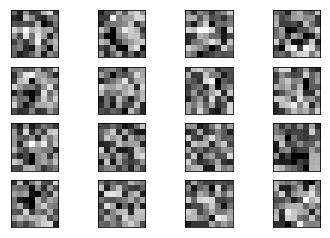

In [78]:
# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(130,130,130), activation='tanh', max_iter=1000, alpha=1e-6,
                    solver='sgd', verbose=10, tol=1e-6, random_state=2,
                    learning_rate_init=.1)

mlp.fit(train_features, train_labels)
print("Training set score: %f" % mlp.score(train_features, train_labels))
print("Test set score: %f" % mlp.score(test_features, test_labels))

plt.figure(figsize=(20,20))
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.imshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.55 * vmin,
               vmax=.55 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()